In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Statistical Analysis of Pokemon Showdown - Jacob Hornung - [Website](https://jhornung1.github.io)
The goal for this project is to analyze the community and usage rate of Pokemon in competetive Pokemon singles. All of my data comes from a single source, but it is in incredibly extensive source, and that is the Smogon usage rates stats page. There is an incredible amount of data here, which should contain everything that I would need. I will also use a  seperate full list of the Pokemon in order to compare typing, stats, and abilities of all the pokemon that are being used.


### Collaboration Plan
As far as I am aware, for my project a collaboration plan is not needed as I am doing this by myself and only have to collaborate with myself.

# Milestone 2
For this second Milestone I want to accomplish the second primary goal that was outlined in my Milestone 1. I need to find a dataset that lists every single Pokemon, their type, and their BST (Base Stat Total). Once I am able to gain that information, the amount of comparisons I can do is almost limitless (at least in terms of competetive Pokemon analysis).

The questions that I want to answer by the time this Milestone is finished are as follows: What is the most popular type in OverUsed as of the most current useage rate calculation? What are the Summary Statistics of the OU Pokemon (to be considered and OU Pokemon you must have useage about 4.52%)? What are the most used types across the main ladders (Ubers, OU, UU, RU, NU and PU)? And finally, which tier has the least standard deviation of BST?

I know for a fact that all of the data I will be using is correct because they are all derived from a single source, and it is impossible to have bias with useage rates. There could possibly be systematic bias inherent to the strengths of different Pokemon, but that is also what brings excitement into the games that are played. The second data source that I am using is also correct, as it is a data source managed by multiple fans of the Pokemon series and stats and typing are not really data that can be interpreted incorrectly.

## The Second Data Set (Pokemon Stats and Typing)

In [2]:
P2024_09_ou_1500 = pd.read_csv('https://www.smogon.com/stats/2024-09/gen9ou-1500.txt', delimiter='|', skiprows={0,1,2,4}, skipfooter=1, engine='python')
P2024_09_ou_1500 = P2024_09_ou_1500.drop(columns=[' ', ' .1']) # Drops the nan columns that are generated
P2024_09_ou_1500.columns = ['Rank', 'Pokemon', 'Usage %', 'RAW', 'RAW %', 'REAL', 'REAL %'] # Renames columns into an easier to read and clean dataset

# Flagging the numerical values as floats
for column in ['Usage %', 'RAW %', 'REAL %']:
  P2024_09_ou_1500[column] = P2024_09_ou_1500[column].astype(str).str.replace('%', '') # Replaces the % sign with nothing, ie. removing it
  P2024_09_ou_1500[column] = P2024_09_ou_1500[column].astype(float) / 100 # changes the type of each to a float

P2024_09_ou_1500.head()

,Rank,Pokemon,Usage %,RAW,RAW %,REAL,REAL %
0,1,Great Tusk,0.309407,563847,0.25783,438832,0.25652
1,2,Kingambit,0.223230,417612,0.19096,275574,0.16109
2,3,Gholdengo,0.205306,391079,0.17883,296858,0.17353
3,4,Dragapult,0.172418,361860,0.16547,278739,0.16294
4,5,Iron Valiant,0.167079,311532,0.14245,222736,0.13020


In [3]:
P2024_09_uu_1500 = pd.read_csv('https://www.smogon.com/stats/2024-09/gen9uu-1500.txt', delimiter='|', skiprows={0,1,2,4}, skipfooter=1, engine='python')
P2024_09_uu_1500 = P2024_09_uu_1500.drop(columns=[' ', ' .1']) # Drops the nan columns that are generated
P2024_09_uu_1500.columns = ['Rank', 'Pokemon', 'Usage %', 'RAW', 'RAW %', 'REAL', 'REAL %'] # Renames columns into an easier to read and clean dataset

# Flagging the numerical values as floats
for column in ['Usage %', 'RAW %', 'REAL %']:
  P2024_09_uu_1500[column] = P2024_09_uu_1500[column].astype(str).str.replace('%', '') # Replaces the % sign with nothing, ie. removing it
  P2024_09_uu_1500[column] = P2024_09_uu_1500[column].astype(float) / 100 # changes the type of each to a float

P2024_09_uu_1500.head()

,Rank,Pokemon,Usage %,RAW,RAW %,REAL,REAL %
0,1,Excadrill,0.304421,58954,0.27058,48005,0.27517
1,2,Lokix,0.256807,52612,0.24147,41956,0.24050
2,3,Greninja,0.214473,43920,0.20158,33608,0.19265
3,4,Scizor,0.203544,42972,0.19723,34694,0.19887
4,5,Tornadus-Therian,0.193497,36900,0.16936,30614,0.17548


In [4]:
P2024_09_ru_1500 = pd.read_csv('https://www.smogon.com/stats/2024-09/gen9ru-1500.txt', delimiter='|', skiprows={0,1,2,4}, skipfooter=1, engine='python')
P2024_09_ru_1500 = P2024_09_ru_1500.drop(columns=[' ', ' .1']) # Drops the nan columns that are generated
P2024_09_ru_1500.columns = ['Rank', 'Pokemon', 'Usage %', 'RAW', 'RAW %', 'REAL', 'REAL %'] # Renames columns into an easier to read and clean dataset

# Flagging the numerical values as floats
for column in ['Usage %', 'RAW %', 'REAL %']:
  P2024_09_ru_1500[column] = P2024_09_ru_1500[column].astype(str).str.replace('%', '') # Replaces the % sign with nothing, ie. removing it
  P2024_09_ru_1500[column] = P2024_09_ru_1500[column].astype(float) / 100 # changes the type of each to a float

P2024_09_ru_1500.head()

,Rank,Pokemon,Usage %,RAW,RAW %,REAL,REAL %
0,1,Cyclizar,0.275929,22288,0.24262,18302,0.24626
1,2,Krookodile,0.167924,14831,0.16145,12384,0.16663
2,3,Goodra-Hisui,0.163344,14518,0.15804,12086,0.16262
3,4,Slowbro,0.152537,12398,0.13496,10382,0.13969
4,5,Bisharp,0.149668,11907,0.12962,9293,0.12504


The first step is to get really simple, and basic example data. This we will just take from the Gen 9 OU useage rates. We then will go to PokemonDB (a database site) and using what we recently learned in class, we scrape the table to get the stats and BST of every single Pokemon ever (including different Pokemon forms).

In [5]:
import requests

# Had to use custom user agent to bypass 403
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'
}
response = requests.get("https://pokemondb.net/pokedex/all", headers=headers)

# Read HTML table
tables = pd.read_html(response.content)
pokemon_df_table = tables[0]  # Assuming the table is the first one on the page
pokemon_df_table.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,309,39,52,43,60,50,65


The very first step is splitting the type column into two columns in order to manage dual type Pokemon. We also need to move those columns into a better location on the DataFrame.



In [6]:
# First we need to slpit the two types into two tables and drop the old Type column
pokemon_df_table[['Type 1', 'Type 2']] = pokemon_df_table['Type'].str.split(' ', n=1, expand=True)
pokemon_df_table = pokemon_df_table.drop(columns=['Type'])

# We then re-order the columns into a better order
pokemon_df_table = pokemon_df_table[['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

# Finally we set the Pokedex Number as the index
pokemon_df_table = pokemon_df_table.set_index('#')

# Display the improved DataFrame
pokemon_df_table.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,Charmander,Fire,None,309,39,52,43,60,50,65


Now we have the problem of certain Pokemon not lining up with their names in the Data we have from Showdown. To fix this we need to change all of the regional forms into a unified format and all of the Mega pokemon into a unified format (both the same format that our Smogon data is in).

In [7]:
# Function to format Mega Pokemon names
def clean_pokemon_name_mega(name):
    if "Mega" in name:
        parts = name.split("Mega ", 1)
        if len(parts) > 1:
            return parts[1] + "-Mega"
        else:
            return name  # Handle cases where "Mega" might be part of a different word (like Yanmega or Meganium)
    return name

# Function to format Alolan Pokemon Names
def clean_pokemon_name_alolan(name):
    if "Alolan" in name:
        parts = name.split("Alolan ", 1)
        if len(parts) > 1:
            return parts[1] + "-Alola"
    else:
        return name

# Function to format Galarian Pokemon Names
def clean_pokemon_name_galarian(name):
    if "Galarian" in name:
        parts = name.split("Galarian ", 1)
        if len(parts) > 1:
            return parts[1] + "-Galar"
    else:
        return name

# Function to format Hisuian Pokemon Names
def clean_pokemon_name_hisuian(name):
    if "Hisuian" in name:
        parts = name.split("Hisuian ", 1)
        if len(parts) > 1:
            return parts[1] + "-Hisui"
    else:
        return name

# Function to format Paldean Names
def clean_pokemon_name_paldean(name):
    if "Paldean" in name:
        parts = name.split("Paldean ", 1)
        if len(parts) > 1:
            return parts[1] + "-Paldea"
    else:
        return name

# Apply the cleaning function to the 'Pokemon' column
pokemon_df_table['Name'] = pokemon_df_table['Name'].apply(clean_pokemon_name_mega)
pokemon_df_table['Name'] = pokemon_df_table['Name'].apply(clean_pokemon_name_alolan)
pokemon_df_table['Name'] = pokemon_df_table['Name'].apply(clean_pokemon_name_galarian)
pokemon_df_table['Name'] = pokemon_df_table['Name'].apply(clean_pokemon_name_hisuian)
pokemon_df_table['Name'] = pokemon_df_table['Name'].apply(clean_pokemon_name_paldean)

pokemon_df_table.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,Venusaur-Mega,Grass,Poison,625,80,100,123,122,120,80
4,Charmander,Fire,None,309,39,52,43,60,50,65


Venusaur Mega Venusaur is looking a lot better now. Now we have the much more labor intensive portion, which is fixing every single multi form Pokemon and their names. Because the Smogon ueage rates do not differ by forms, we would have problems with, for example, linking together the Ogerpon forms as their names are different in our two datasets. There is no way that I can think of to do this automatically (as each form has different conditions) so I went down the list and manually fixed every form change.

In [8]:
# Simplifying the name because I will be typing it a lot
pdft = pokemon_df_table

# All of the manual changes that needed to be done
pdft['Name'] = pdft['Name'].str.replace(r"Tauros\s+Combat\s+Breed", "Tauros-Paldea-Combat", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Tauros\s+Blaze\s+Breed", "Tauros-Paldea-Blaze", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Tauros\s+Aqua\s+Breed", "Tauros-Paldea-Aqua", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Kyogre\s+Primal\s+Kyogre", "Kyogre-Primal", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Groudon\s+Primal\s+Groudon", "Groudon-Primal", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Deoxys\s+Normal\s+Deoxys", "Deoxys", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Deoxys\s+Attack\s+Deoxys", "Deoxys-Attack", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Deoxys\s+Defense\s+Deoxys", "Deoxys-Defense", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Deoxys\s+Speed\s+Deoxys", "Deoxys-Speed", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Burmy\s+Plant\s+Cloak", "Burmy-Plant", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Burmy\s+Sandy\s+Cloak", "Burmy-Sandy", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Burmy\s+Trash\s+Cloak", "Burmy-Trash", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Wormadam\s+Plant\s+Cloak", "Wormadam-Plant", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Wormadam\s+Sandy\s+Cloak", "Wormadam-Sandy", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Wormadam\s+Trash\s+Cloak", "Wormadam-Trash", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Rotom\s+Heat\s+Rotom", "Rotom-Heat", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Rotom\s+Wash\s+Rotom", "Rotom-Wash", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Rotom\s+Frost\s+Rotom", "Rotom-Frost", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Rotom\s+Fan\s+Rotom", "Rotom-Fan", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Rotom\s+Mow\s+Rotom", "Rotom-Mow", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Dialga\s+Origin\s+Forme", "Dialga-Origin", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Palkia\s+Origin\s+Forme", "Palkia-Origin", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Giratina\s+Origin\s+Altered", "Giratina-Origin-Altered", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Giratina\s+Origin\s+Giratina", "Giratina-Origin", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Shaymin\s+Land\s+Forme", "Shaymin", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Shaymin\s+Sky\s+Forme", "Shaymin-Sky", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Basculin\s+Red\s+Striped", "Basculin", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Darmanitan\s+Standard\s+Mode", "Darmanitan", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Tornadus\s+Incarnate\s+Forme", "Tornadus", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Thundurus\s+Incarnate\s+Forme", "Thundurus", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Landorus\s+Incarnate\s+Forme", "Landorus", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Tornadus\s+Therian\s+Forme", "Tornadus-Therian", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Thundurus\s+Therian\s+Forme", "Thundurus-Therian", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Landorus\s+Therian\s+Forme", "Landorus-Therian", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Kyurem\s+Black\s+Kyurem", "Kyurem-Black", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Kyurem\s+White\s+Kyurem", "Kyurem-White", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Keldeo\s+Ordinary\s+Form", "Keldeo", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Meloetta\s+Airia\s+Forme", "Meloetta", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Meowstic\s+Male", "Meowstic", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Aegislash\s+Shield\s+Forme", "Aegislash", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Pumpkaboo\s+Average\s+Size", "Pumpkaboo", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Gourgeist\s+Average\s+Size", "Gourgeist", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Hoopa\s+Hoopa\s+Unbound", "Hoopa-Unbound", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Hoopa\s+Hoopa\s+Confined", "Hoopa", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Zygarde\s+50%\s+Forme", "Zygarde", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Zygarde\s+10%\s+Forme", "Zygarde-10%", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Oricorio\s+Baile\s+Style", "Oricorio", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Oricorio\s+Pom-Pom\s+Style", "Oricorio-Pom-Pom", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Oricorio\s+Sensu\s+Style", "Oricorio-Sensu", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Oricorio\s+Pa'u\s+Style", "Oricorio-Pa'u", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Lycanroc\s+Midday\s+Form", "Lycanroc", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Lycanroc\s+Dusk\s+Form", "Lycanroc-Dusk", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Lycanroc\s+Midnight\s+Form", "Lycanroc-Midnight", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Wishiwashi\s+School\s+Form", "Wishiwashi", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Minior\s+Meteor\s+Form", "Minior", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Necrozma\s+Dusk\s+Mane\n+Necrozma", "Necrozma-Dusk-Mane", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Necrozma\s+Dawn\s+Wings\n+Necrozma", "Necrozma-Dawn-Wings", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Toxtricity\s+Low\s+Key\n+Form", "Toxtricity", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Eiscue\s+Ice\s+Face", "Eiscue", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Morpeko\s+Hangry\s+Mode", "Morpeko", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Indeedee\s+Male\s", "Indeedee", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Indeedee\s+Female\s", "Indeedee-F", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Zacian\s+Hero\s+of\s+Many\s+Battles", "Zacian", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Zamazenta\s+Hero\s+of\s+Many\s+Battles", "Zamazenta", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Zacian\s+Crowned\s+Sword", "Zacian-Crowned", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Zamazenta\s+Crowned\s+Shield", "Zamazenta-Crowned", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Urshifu\s+Single\s+Strike\s+Style", "Urshifu", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Urshifu\s+Rapid\s+Strike\s+Style", "Urshifu-Rapid-Strike", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Calyrex\s+Ice\s+Rider", "Calyrex-Ice", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Calyrex\s+Shadow\s+Rider", "Calyrex-Shadow", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Ursaluna\s+Bloodmoon", "Ursaluna-Bloodmoon", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Basculegion\s+Male", "Basculegion", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Basculegion\s+Female", "Basculegion-F", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Enamorus\s+Incarnate\s+Forme", "Enamorus", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Enamorus\s+Therian\s+Forme", "Enamorus-Therian", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Oinkologne\s+Male", "Oinkologne", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Oinkologne\s+Female", "Oinkologne-F", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Maushold\s+Family\s+of\s+Four", "Maushold", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Squakabilly\s+Green\s+Plumage", "Squakabilly", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Palafin\s+Hero\s+Form", "Palafin", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Tatsugiri\s+Curly\s+Form", "Tatsugiri", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Dudunsparce\s+Two-Segment\s+Form", "Dudunsparce", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Gimmighoul\s+Chest\s+Form", "Gimmighoul", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Ogerpon\s+Teal\s+Mask", "Ogerpon", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Ogerpon\s+Wellspring\s+Mask", "Ogerpon-Wellspring", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Ogerpon\s+Hearthflame\s+Mask", "Ogerpon-Hearthflame", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Ogerpon\s+Cornerstone\s+Mask", "Ogerpon-Cornerstone", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Terapagos\s+Terastal\s+Form", "Terapagos", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Charizard\s+X-Mega", "Charizard-Mega-X", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Charizard\s+Y-Mega", "Charizard-Mega-Y", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Mewtwo\s+X-Mega", "Mewtwo-Mega-X", regex=True)
pdft['Name'] = pdft['Name'].str.replace(r"Mewtwo\s+Y-Mega", "Mewtwo-Mega-Y", regex=True)

# We now rename the column name for 'Name' to be 'Pokemon' to line up with the other datasets
pdft = pdft.rename(columns={'Name': 'Pokemon'})

pdft.head()

,Pokemon,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,Venusaur-Mega,Grass,Poison,625,80,100,123,122,120,80
4,Charmander,Fire,None,309,39,52,43,60,50,65


Wow! That was a lot of the exact same function called over and over again! Luckily, we only need to do that once. Now we have a fully functional list of every single Pokemon with their typing in BST, so the next step is to apply that to the Gen 9 OU dataset that we created earlier.

In [9]:
pdft['Pokemon'] = pdft['Pokemon'].str.strip()
pdft['Type 1'] = pdft['Type 1'].str.strip()
pdft['Type 2'] = pdft['Type 2'].str.strip()
P2024_09_ou_1500['Pokemon'] = P2024_09_ou_1500['Pokemon'].str.strip()

# Merge the two datasets based on the 'Pokemon' column
merged_df = pd.merge(P2024_09_ou_1500, pdft, on='Pokemon', how='left')

# Setting the Rank to be the index
merged_df = merged_df.set_index('Rank')

# Display the merged DataFrame
merged_df.head()

,Pokemon,Usage %,RAW,RAW %,REAL,REAL %,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Rank,,,,,,,,,,,,,,,
1,Great Tusk,0.309407,563847,0.25783,438832,0.25652,Ground,Fighting,570.0,115.0,131.0,131.0,53.0,53.0,87.0
2,Kingambit,0.223230,417612,0.19096,275574,0.16109,Dark,Steel,550.0,100.0,135.0,120.0,60.0,85.0,50.0
3,Gholdengo,0.205306,391079,0.17883,296858,0.17353,Steel,Ghost,550.0,87.0,60.0,95.0,133.0,91.0,84.0
4,Dragapult,0.172418,361860,0.16547,278739,0.16294,Dragon,Ghost,600.0,88.0,120.0,75.0,100.0,75.0,142.0
5,Iron Valiant,0.167079,311532,0.14245,222736,0.13020,Fairy,Fighting,590.0,74.0,130.0,90.0,120.0,60.0,116.0


And with that, we have combined the two datasets and also have that stats data set saved and ready to be combined with any other useage rate datasets. Now let's answer some questions and look at some tables.

## Question 1: Most Popular Type in Gen 9 OU (Currently)

Time for the easiest question to answer, what is the most (reasonably) used type in OverUsed right now? To do this we simply need to graph a total of all the types used for all Pokemon above a certain useage rate. I chose 4.52% as the number to use (for the useage rate minimum), as that is the cutoff number for whether or not a Pokemon can be considered an OU Pokemon

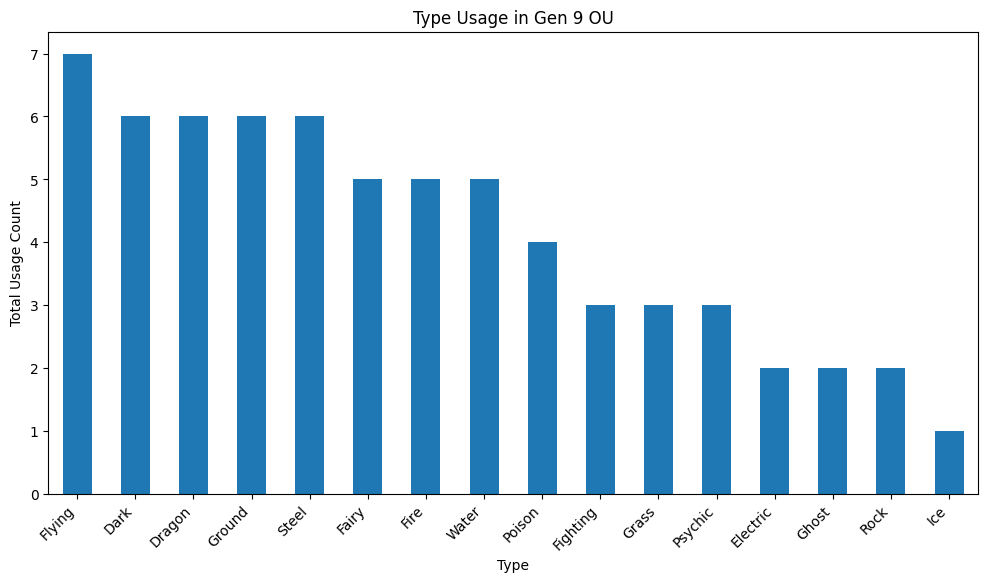

In [11]:
# Filter Pokemon with usage percentage greater than or equal to 4.52%
filtered_df = merged_df[merged_df['Usage %'] >= 0.0452]

# Count each type in 'Type 1' and 'Type 2' columns
type1_counts = filtered_df['Type 1'].value_counts()
type2_counts = filtered_df['Type 2'].value_counts()

# Combine type counts
all_types = pd.concat([type1_counts, type2_counts])
type_counts = all_types.groupby(all_types.index).sum()
type_counts = type_counts.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
type_counts.plot(kind='bar')
plt.title('Type Usage in Gen 9 OU')
plt.xlabel('Type')
plt.ylabel('Total Usage Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability (found this from a tutorial video)
plt.show()

We can see that Flying is the most used type in OverUsed right now, at 7 total Pokemon. This was surprising to me at first as I didn't think that there were that many flying Pokemon in OU, but with the most used Pokemon right now being a Ground-Fighting type, Flying types do make sense to have. Ice is really funny to have at the bottom (with only 1) as that only 1 ice type is the most controversial ice type in this current generation, Kyurem.

## Question 2: Summary Statistics of OU BST
This calculation is also quite easy, as we are just looking at the BST of every Pokemon with greater or equal to 4.52% useage rate. We want to calculate the mean, mode, and median of the BST (which would be under the "Total" column).

In [12]:
# Calculate mean, mode, and median of BST for Pokemon with usage >= 4.52%
bst_data = filtered_df['Total']

mean_bst = np.mean(bst_data)
mode_bst = bst_data.mode()[0]  # Get the first mode (as a lot exist)
median_bst = np.median(bst_data)

print(f"Mean BST: {mean_bst}")
print(f"Mode BST: {mode_bst}")
print(f"Median BST: {median_bst}")

Mean BST: 553.2702702702703
Mode BST: 590.0
Median BST: 570.0


These were just the stats for OU, so now lets look at the stats for UU and RU for a comparison (UU is the tier below and RU is the tier below UU).

In [14]:
# Merge UU usage data with the Pokemon stats
P2024_09_uu_1500['Pokemon'] = P2024_09_uu_1500['Pokemon'].str.strip()
merged_uu_df = pd.merge(P2024_09_uu_1500, pdft, on='Pokemon', how='left')
merged_uu_df = merged_uu_df.set_index('Rank')

# Filter UU Pokemon based on usage
filtered_uu_df = merged_uu_df[merged_uu_df['Usage %'] >= 0.0452]

# Calculate summary stats for UU
bst_data_uu = filtered_uu_df['Total']
mean_bst_uu = np.mean(bst_data_uu)
mode_bst_uu = bst_data_uu.mode()[0]
median_bst_uu = np.median(bst_data_uu)

print(f"UU Mean BST: {mean_bst_uu}")
print(f"UU Mode BST: {mode_bst_uu}")
print(f"UU Median BST: {median_bst_uu}\n")


# Merge RU usage data with the Pokemon stats
P2024_09_ru_1500['Pokemon'] = P2024_09_ru_1500['Pokemon'].str.strip()
merged_ru_df = pd.merge(P2024_09_ru_1500, pdft, on='Pokemon', how='left')
merged_ru_df = merged_ru_df.set_index('Rank')

# Filter RU Pokemon based on usage
filtered_ru_df = merged_ru_df[merged_ru_df['Usage %'] >= 0.0452]

# Calculate summary stats for RU
bst_data_ru = filtered_ru_df['Total']
mean_bst_ru = np.mean(bst_data_ru)
mode_bst_ru = bst_data_ru.mode()[0]
median_bst_ru = np.median(bst_data_ru)

print(f"RU Mean BST: {mean_bst_ru}")
print(f"RU Mode BST: {mode_bst_ru}")
print(f"RU Median BST: {median_bst_ru}")

UU Mean BST: 537.1944444444445
UU Mode BST: 580.0
UU Median BST: 530.0

RU Mean BST: 525.9230769230769
RU Mode BST: 580.0
RU Median BST: 519.0


These stats surprised me, as I fully expected a major difference in BST between OverUsed and RarelyUsed, but there is hardly a noticeable difference. I believe that this confusion could be solved by my next question, which is the change in total BST over every generation of Pokemon.

## Question 3: How has the BST of OU Changed Every Generation?

Step 1 is defining a read in function (something I should have made earlier) to read in files from the Smogon stats page. I did this using the code from Lab 5, and having to read in all of the year files from excercize 1.

In [15]:
def read_pokemon_data(generation, tier):
    url = f"https://www.smogon.com/stats/2024-10/{generation}{tier}-1500.txt"
    pokemon_df = pd.read_csv(url, delimiter='|', skiprows={0,1,2,4}, skipfooter=1, engine='python')
    pokemon_df = pokemon_df.drop(columns=[' ', ' .1']) # Drops the nan columns that are generated
    pokemon_df.columns = ['Rank', 'Pokemon', 'Usage %', 'RAW', 'RAW %', 'REAL', 'REAL %'] # Renames columns into an easier to read and clean dataset

    # Flagging the numerical values as floats
    for column in ['Usage %', 'RAW %', 'REAL %']:
        pokemon_df[column] = pokemon_df[column].astype(str).str.replace('%', '') # Replaces the % sign with nothing, ie. removing it
        pokemon_df[column] = pokemon_df[column].astype(float) / 100 # changes the type of each to a float
    pokemon_df['Pokemon'] = pokemon_df['Pokemon'].str.strip()
    merged_df = pd.merge(pokemon_df, pdft, on='Pokemon', how='left')
    merged_df = merged_df.set_index('Rank')

    return merged_df

Now we simply need to read in every generation and every ou, get the mean for the BST for each OU, then graph the change in BST.

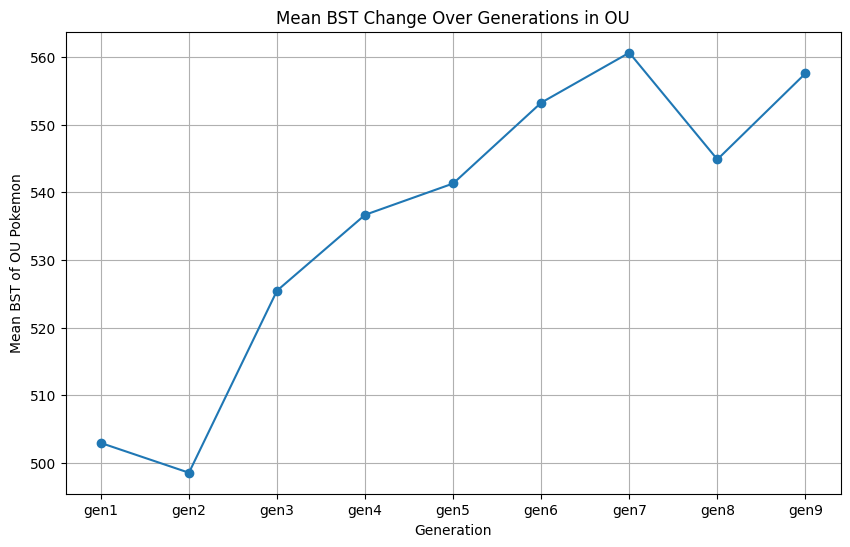

In [17]:
# Creating the generations for the input
generations = ['gen1', 'gen2', 'gen3', 'gen4', 'gen5', 'gen6', 'gen7', 'gen8', 'gen9']
bst_means = []

# Reading in each data file and saving mean BST
for gen in generations:
    df = read_pokemon_data(gen, 'ou')
    filtered_df = df[df['Usage %'] >= 0.0452]
    bst_means.append(np.mean(filtered_df['Total']))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(generations, bst_means, marker='o')
plt.xlabel('Generation')
plt.ylabel('Mean BST of OU Pokemon')
plt.title('Mean BST Change Over Generations in OU')
plt.grid(True)
plt.show()

I genuinely love this graph. It perfectly shows the change in average BST across the generations. The dips can easily be explained as the splitting of the Special stat after gen 1, and the removal of mega Pokemon after gen 7. The only thing is that is looks like there is a massive gap between Gen 1 and Gen 7, but this is because the graph starts at 500. When it starts at 0 we get a graph that looks like this:

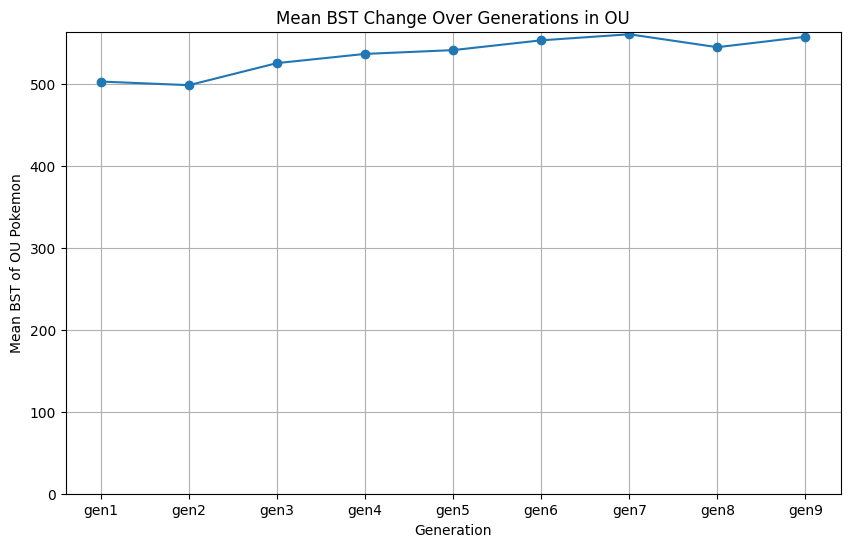

In [18]:
# Create the plot with y-axis starting at 0
plt.figure(figsize=(10, 6))
plt.plot(generations, bst_means, marker='o')
plt.xlabel('Generation')
plt.ylabel('Mean BST of OU Pokemon')
plt.title('Mean BST Change Over Generations in OU')
plt.grid(True)
plt.ylim(bottom=0)  # Set the bottom limit of the y-axis to 0
plt.show()

This graph we do see a general increase in average BST, but it is not as big of a change.

## Question 4: Which tier has the Least Deviation of BST?

This is a very simple question, but it a very important question. The tier with the least standard deviation of BST could be considered the most "stanard" tier as all the Pokemon are the closest to each other. We first use read_pokemon_data to read the data for all main tiers (OU, UU, RU, NU, PU, ZU), then we determine the mean BST then the standard deviation, compaing the STDev using a graph.

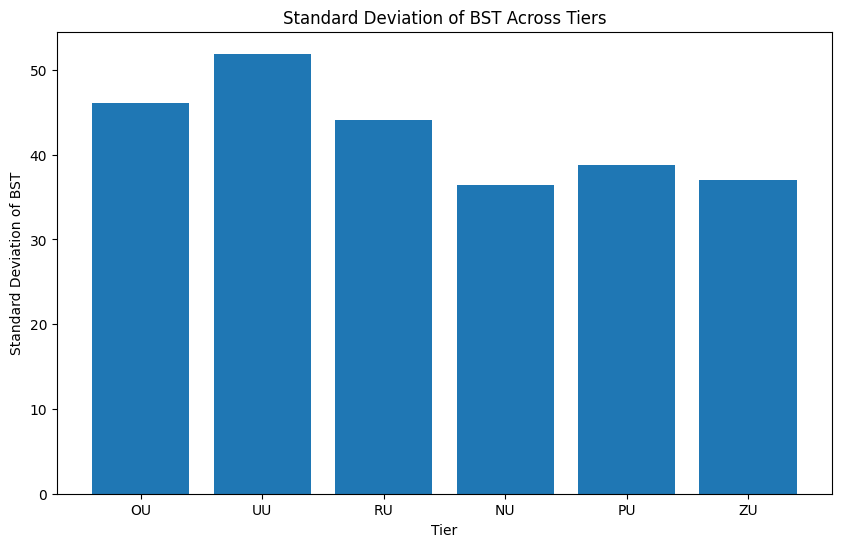

In [21]:
# Creating all the arrays needed
tiers = ['ou', 'uu', 'ru', 'nu', 'pu', 'zu']
stdevs = []
tier_names = []

# Reading in every tier and saving the stdev
for tier in tiers:
    df = read_pokemon_data('gen9', tier)
    filtered_df = df[df['Usage %'] >= 0.0452]
    stdev = np.std(filtered_df['Total'])
    stdevs.append(stdev)
    tier_names.append(tier.upper())


plt.figure(figsize=(10, 6))
plt.bar(tier_names, stdevs)
plt.xlabel('Tier')
plt.ylabel('Standard Deviation of BST')
plt.title('Standard Deviation of BST Across Tiers')
plt.show()

NU shows that it is the best tier with the smallest Standard Deviatino of around 38 points of BST (which is incredibly small). Surprisingly, UU take the lead (I thought for sure it would be OU) for the greatest Standard Deviation.

## Question 5: Which Tier has the most Offense in Comparison to Defense?

This question is phrased strangely, but there is always the difference between tiers of whether offense is stronger than defense. I think I can answer this question by doing something similar to the Standard Deviation question, but instead comparing the offense and defense for each tier. I am predicting that the further down we go in tiers, the more powerful offense is (ie. attacking stats will be far greater than defense stats).

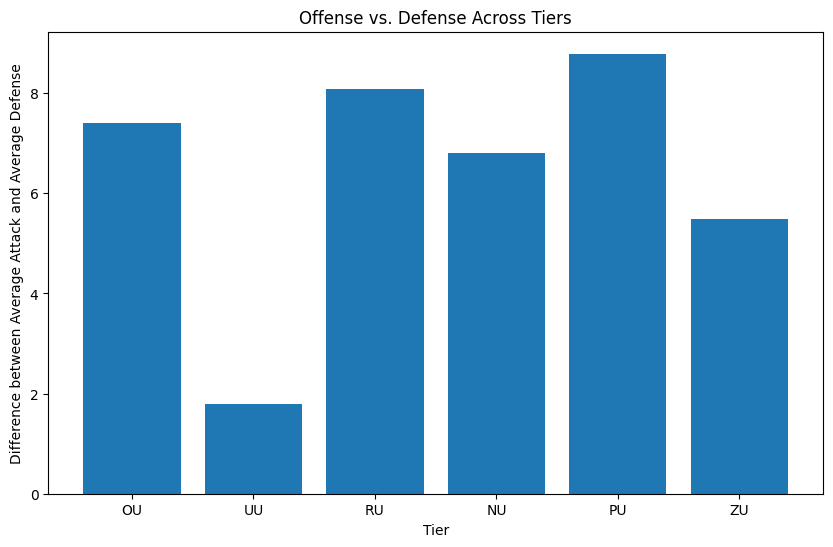

In [22]:
# Calculate the difference between total attack and total defense for each tier
tiers = ['ou', 'uu', 'ru', 'nu', 'pu', 'zu']
offense_defense_diffs = []
tier_names = []

# Reading in all the differences between stats
for tier in tiers:
    df = read_pokemon_data('gen9', tier)
    filtered_df = df[df['Usage %'] >= 0.0452]
    offense_defense_diffs.append(np.mean(filtered_df['Attack']) - np.mean(filtered_df['Defense']))
    tier_names.append(tier.upper())

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(tier_names, offense_defense_diffs)
plt.xlabel('Tier')
plt.ylabel('Difference between Average Attack and Average Defense')
plt.title('Offense vs. Defense Across Tiers')
plt.show()

I was completely wrong, and this data is crazy to look at. UU is almost completely balanced both offensively and defensively, with PU having the greatest difference between Offensive and Defensive stats (with offensive stats being on average 9 points greater). With all of the questions I have asked, it genuinely seems like UU is just the most balanced tier to play with a great stdev and a balance between offense and defense.

___
## Closing Thoughts:
After all of this data analyzation, there are two things I wish to accomplish moving forward. Most importantly, I want to go further in depth into individual Pokemon. I want to track prospective growth of individual Pokemon against the useage of typing. For example, if a metagame has a large use rate of fighting types, it makes sense that Pokemon like Tyranitar (which is very weak to fighting) would drop in useage. I want to categorically chart this change in individual Pokemon useage.

I have also mainly only looked at current generation or past gen's ou. I want to branch out to some smaller ladders, and in specific, I want to lean into Little Cup. I want to apply useage in Little Cup to useage in higher tiers, and possibly see links between general strength of lower level Pokemon in comparison to strengths of the highest level Pokemon.

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
%shell
!jupyter nbconvert --to html /content/jacob_milestone2.ipynb

[NbConvertApp] Converting notebook /content/jacob_milestone2.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 680277 bytes to /content/jacob_milestone2.html
